<a href="https://colab.research.google.com/github/Nils1511/EE769/blob/main/EE769_Assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Write a function to generate a data matrix X. Inputs: Number of samples, feature dimension. Output: Data matrix X.** 

In [ ]:
#import libraries
import numpy as np
#function to generate random 
def generate_data_matrix(num_samples, feature_dimension):
    X = np.random.rand(num_samples, feature_dimension)            # Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)
    return X
# X = generate_data_matrix(int(input("num_samples:")), int(input("feature_dimension:")))
# print(X)

**2. Write a function to generated dependent variable column t.**

 **a) Inputs: Data matrix X, weight vector for each column, bias w0, noise variance**

 **b) Output: Target vector t**

In [ ]:
def generate_target_vector(X, weights, bias, noise_variance):
    num_samples = X.shape[0]
    t = np.dot(X, weights) + bias + np.random.normal(scale=np.sqrt(noise_variance), size=num_samples)       #  t = xT.w + bias +  std_dev*epsilon , where epsilon is standard random normal
    return t
# X = generate_data_matrix(int(input("num_samples:")), int(input("feature_dimension:")))
# w = np.random.rand(int(input("w:")))                               # create random array of size column C with uniform distributions over [0,1)
# bias = float(input("bias:"))                        # declare bias 
# noise_variance = float(input("noise variance:"))    # declare noise variance
# t = generate_target_vector(X, w, bias, noise_variance)
# print(t)

**3. Write a function to compute a linear regression estimate.**

 **a) Input: data matrix X and weight vector w**

 **b) Output: y**

In [ ]:
bias = 1 
def linear_regression_estimate(X, w):
    y = np.dot(X, w) + bias                         # y = xT.w
    return y
# y = linear_regression_estimate(X, w)
# print(y)

**4. Write a function to compute the mean square error of two vectors y and t.**



- formula used: $MSE = \frac{1}{N}\sum_{n=1}^{N}[t_{n} − w^{T}φ(x_{n})]^{2}$ 

In [ ]:
def mean_square_error(y, t):
    return np.mean((y - t) ** 2)             # we get from above formula  & y = wTφ(xn) here  φ(xn) = X matrix only      
# mse = mean_square_error(y, t)
# print(mse)

5. **Write a function to estimate the weights of linear regression using pseudo-inverse, assuming L2 regularization:**

 **a) Input: X, t, and lambda**

 **b) Output: w, MSE, y**

In [ ]:
def estimate_weights_l2(X, t, lmbda):
    # transpose of matrix
    X_T = X.T
    # matrix = λ*I
    identity = lmbda * np.eye(X.shape[1]) 
    # inverse of (λ*I + X^T.X)       
    inverted = np.linalg.pinv(np.dot(X_T, X) + identity)
    # w = (λ*I + X^T.X)^(-1).X^T formula from slides
    w = np.dot(np.dot(inverted, X_T), t)
    y = np.dot(X, w)
    mse = mean_square_error(y, t)
    return w, mse, y
# lmbda = float(input("λ:"))
# w, mse, y = estimate_weights_l2(X, t, lmbda)
# print(w, mse, y)

6. **Write* a function to compute the gradient of MSE with respect to its weight vector.**

 **a) Input: X matrix, t vector, and w vector**

 **b) Output: gradient vector**

In [ ]:
def gradient_MSE(X, t, w):
    y = np.dot(X, w)
   # MSE = (t − xT.w)^2  => d(MSE)/dw =-2* Xt.(t − xT.w) = gradient
    gradient = -2 * np.dot(X.T, (t - y))
    return gradient
# gradient = gradient_MSE(X, t, w)
# print(gradient)

7. **Write a function to compute L2 norm of a vector w passed as a numpy array. Exclude bias w0.** 

In [ ]:
def L2_norm(w):
    w_without_bias = w[1:]                                                     # exclude the bias w0 by slicing the vector from 1st element
    return np.sqrt(np.dot(w_without_bias, w_without_bias))                     # ||w||2 = (wT.w)^(1/2) 
# l2_norm = L2_norm(w)
# print(l2_norm)

8. **Write a function to compute the gradient of L2 norm with respect to the weight vectors.**

 **a) Input: X matrix and w vector**

 **b) Output: gradient vector, where gradient with respect to w0 is 0.**

In [ ]:
def gradient_L2_norm(w):
    gradient = np.zeros(w.shape)                           # gradient vector with the same shape as w
    gradient[1:] = w[1:]                                   # sets the gradient of bias term w0 to 0 and the rest of the weight terms to the original weight values
    return gradient
# gradient = gradient_L2_norm(w)
# print(gradient)

9. **Write a function to compute L1 norm of a vector w passed as a numpy array. Exclude bias w0.**

In [ ]:
def L1_norm(w):
    w_without_bias = w[1:]                                   # exclude the bias w0 by slicing the vector from 1st element
    return np.sum(np.abs(w_without_bias))                    # L1 norm :- the sum of the absolute vector values of w
# l1_norm = L1_norm(w)
# print(l1_norm)

10. **Write a function to compute the gradient of L1 norm with respect to the weight vectors.** 

 **a) Input: X matrix and w vector**

 **b) Output: gradient vector, where gradient with respect to w0 is 0.**

In [ ]:
def gradient_L1_norm(w):
    gradient = np.zeros(w.shape)                           # gradient vector with the same shape as w
    gradient[1:] = np.sign(w[1:])                          # sets the gradient of bias term w0 to 0 and the rest of the weight terms to the signum of the original weight values
    return gradient
# gradient = gradient_L1_norm(w)
# print(gradient)

11. **Write a function for a single update of weights of linear regression using gradient descent.**

 **a) Input: X, t, w, eta, lambda 2, lambda 1. Note that the weight of MSE will be 1**

 **b) Output: updated weight and updated MSE**

In [ ]:
def update_weights(X, t, w, eta, lmbda_2, lmbda_1):
    y = np.dot(X, w)                                                            # linear regression estimate
    gradient_MSE = -2 * np.dot(X.T, (t - y))                                    # gradients for MSE
    gradient_L2 = lmbda_2 * gradient_L2_norm(w)                                 # gradients for L2
    gradient_L1 = lmbda_1 * gradient_L1_norm(w)                                 # gradients for L1
    w = w - (eta * (gradient_MSE + gradient_L2 + gradient_L1))                  # updates the weight vector by subtracting the gradient multiplied by the learning rate
    mse = mean_square_error(y, t)                                               # mean square error calculation
    return w, mse
# eta = 0.1
# lmbda_2 = 0.1
# lmbda_1 = 0.01
# w, mse = update_weights(X, t, w, eta, lmbda_2, lmbda_1)
# print(w, mse)

12. **Write a function to estimate the weights of linear regression using gradient descent.**  

 **a) Inputs: X, t, lambda2 (default 0), lambda1 (default 0), eta, max_iter, min_change_NRMSE**

 **b) Output: Final w, final RMSE normalized with respect to variance of t.**

 **c) Stopping criteria: Either max_iter has been reached, or the normalized  RMSE does not change by more than min_change_NRMSE**

In [ ]:
def calculate_nrmse(y, t):
    rmse = np.sqrt(np.mean((y-t)**2))                     # calculating root mean square error
    nrmse = rmse / (np.max(t) - np.min(t))                # calculating normalised rmse
    return nrmse

In [ ]:
def estimate_weights_gd(X, t, lambda2=0.0, lambda1=0.0, eta=0.01, max_iter=1000, min_change_NRMSE=0.001):
    # Initialize weights with random values
    w = np.random.rand(X.shape[1])
    # Initialize NRMSE
    prev_nrmse = float('inf')
    # Initialize iteration counter
    iter_count = 0
    # Start gradient descent loop
    while True:
        # Compute predictions
        y = np.dot(X, w)
        # Compute gradient of MSE and L2/L1 regularization terms
        gradient_mse = 2 * np.dot(X.T, y - t) / X.shape[0]
        gradient_l2 = 2 * lambda2 * w[1:]
        gradient_l1 = lambda1 * np.sign(w[1:])
        # Update weights
        w[1:] = w[1:] - eta * (gradient_mse[1:] + gradient_l2 + gradient_l1)
        # Compute NRMSE
        curr_nrmse = calculate_nrmse(y, t)
        # Check stopping criteria
        if abs(prev_nrmse - curr_nrmse) < min_change_NRMSE or iter_count > max_iter:
            break
        prev_nrmse = curr_nrmse
        iter_count += 1
    return w, curr_nrmse
# w, nrmse = estimate_weights_gd(X, t, lambda2=0.1, lambda1=0.01, eta=0.1, max_iter=1000, min_change_NRMSE=0.00001)
# print(w, nrmse)

**13. Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:**

**a) Training and validation NRMSE obtained using pseudo inverse with number of training samples.**

In [ ]:
def estimate_weights_pi(X, t, lambda2=0, lambda1=0):

    X_T = X.T
    # Add regularization term to the X'X matrix
    if lambda2 != 0:
        X_T_X = np.dot(X_T, X) + lambda2 * np.eye(X.shape[1])
    elif lambda1 != 0:
        X_T_X = np.dot(X_T, X) + lambda1 * np.eye(X.shape[1])
    else:
        X_T_X = np.dot(X_T, X)
    # Compute the pseudo-inverse of X'X
    X_T_X_inv = np.linalg.pinv(X_T_X)
    # Compute the weights
    w = np.dot(np.dot(X_T_X_inv, X_T), t)

    return w

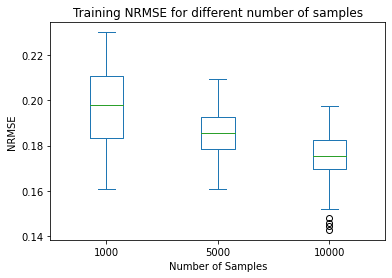

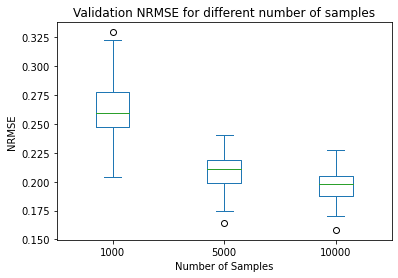

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the number of experiments to run
num_experiments = 100

# Define the range of number of training samples
num_samples_range = [1000,5000,10000]

num_variables =100
noise_var = 0.1
w0 = 1
lmbda_2 = 0
lmbda_1 = 0
dt={}
dv={}
# Run the experiments
for num_samples in num_samples_range:
    train_nrmse_list=[]
    val_nrmse_list=[]
    for i in range(num_experiments):
        # Set a random seed for reproducibility
        np.random.seed(i)

        X_train, X_val, t_train, t_val = train_test_split(generate_data_matrix(num_samples, num_variables),
        generate_target_vector(generate_data_matrix(num_samples, num_variables), np.random.rand(num_variables), w0, noise_var), test_size=0.2)
        w = estimate_weights_pi(X_train, t_train, lmbda_2, lmbda_1)
        train_nrmse = calculate_nrmse(np.dot(X_train, w), t_train)
        val_nrmse = calculate_nrmse(np.dot(X_val, w), t_val)
        train_nrmse_list.append(train_nrmse)
        val_nrmse_list.append(val_nrmse)
        dt[num_samples]=train_nrmse_list
        dv[num_samples]=val_nrmse_list

# Plot the results using box plots
import pandas as pd
dft=pd.DataFrame(dt)
dft.plot(kind="box")
plt.xlabel('Number of Samples')
plt.ylabel('NRMSE')
plt.title("Training NRMSE for different number of samples")
plt.show()

dfv=pd.DataFrame(dv)
dfv.plot(kind="box")
plt.xlabel('Number of Samples')
plt.ylabel('NRMSE')
plt.title("Validation NRMSE for different number of samples")
plt.show()


Comment
- Training and validation NRMSE obtained using pseudo inverse with number of training samples, as the number of training samples increases, the NRMSE would typically decrease, as the model would have more data points to learn from, providing more information for the model to generalize the predictions. However, having too many training samples might lead to overfitting.

**b) Training and validation NRMSE obtained using pseudo inverse with number of variables**

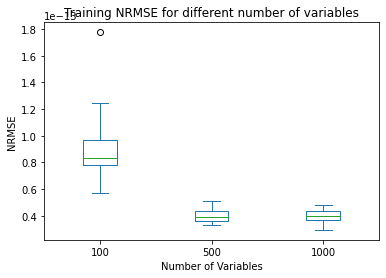

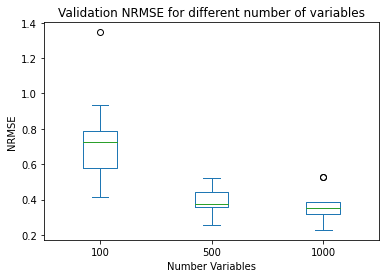

In [ ]:
# Define the number of experiments to run
num_experiments = 10

# Define the range of number of training samples
num_variable_range = [100,500,1000]

num_samples = 100
noise_var = 0.1
w0 = 1
lmbda_2 = 0
lmbda_1 = 0
dt={}
dv={}
# Run the experiments
for num_variables in num_variable_range:
    # Initialize lists to store results for each experiment
    train_nrmse_list = []
    val_nrmse_list = []
    for i in range(num_experiments):
        # Set a random seed for reproducibility
        np.random.seed(i)

        X_train, X_val, t_train, t_val = train_test_split(generate_data_matrix(num_samples, num_variables),
        generate_target_vector(generate_data_matrix(num_samples, num_variables), np.random.rand(num_variables), w0, noise_var), test_size=0.2)
        w = estimate_weights_pi(X_train, t_train, lmbda_2, lmbda_1)
        train_nrmse = calculate_nrmse(np.dot(X_train, w), t_train)
        val_nrmse = calculate_nrmse(np.dot(X_val, w), t_val)
        train_nrmse_list.append(train_nrmse)
        val_nrmse_list.append(val_nrmse)        
        dt[num_variables]=train_nrmse_list
        dv[num_variables]=val_nrmse_list

# Plot the results using box plots
import pandas as pd
dft=pd.DataFrame(dt)
dft.plot(kind="box")
plt.xlabel('Number of Variables')
plt.ylabel('NRMSE')
plt.title("Training NRMSE for different number of variables")
plt.show()

dfv=pd.DataFrame(dv)
dfv.plot(kind="box")
plt.xlabel('Number Variables')
plt.ylabel('NRMSE')
plt.title("Validation NRMSE for different number of variables")
plt.show()

Comment:
- As the number of variables increases, the NRMSE would typically decrease as the model would have more features to learn from, providing more information for the model to generalize the predictions. However, having too many variables might lead to overfitting or increase in computational cost.

**c) Training and validation NRMSE obtained using pseudo inverse with noise variance**

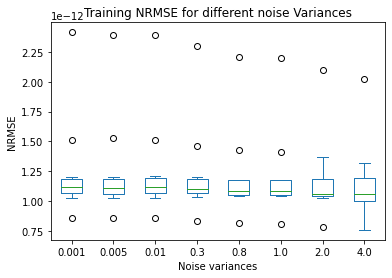

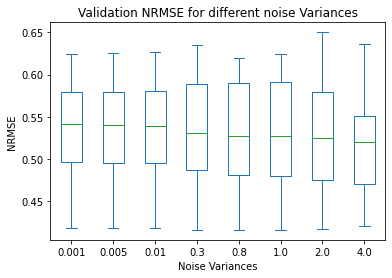

In [ ]:
# Define the number of experiments to run
num_experiments = 10

# Define the noise variances to test
noise_var_list = [0.001,0.005,0.01,0.3,0.8,1,2,4]#[0.01, 0.05, 0.1, 0.15, 0.2, 0.25]

# Define other parameters for the experiments
num_samples = 1000
num_variables = 1000
w0 = 1
lmbda_2 = 0
lmbda_1 = 0
dt={}
dv={}
# Run the experiments
for noise_var in noise_var_list:
# Initialize lists to store NRMSE for each experiment
    train_nrmse_list = []
    val_nrmse_list = []
    for i in range(num_experiments):
        # Set a random seed for reproducibility
        np.random.seed(i)

        X_train, X_val, t_train, t_val = train_test_split(generate_data_matrix(num_samples, num_variables), 
        generate_target_vector(generate_data_matrix(num_samples, num_variables), np.random.rand(num_variables), w0, noise_var), test_size=0.2)
        w = estimate_weights_pi(X_train, t_train, lmbda_2, lmbda_1)
        train_nrmse = calculate_nrmse(np.dot(X_train, w), t_train)
        val_nrmse = calculate_nrmse(np.dot(X_val, w), t_val)
        train_nrmse_list.append(train_nrmse)
        val_nrmse_list.append(val_nrmse)
        dt[noise_var]=train_nrmse_list
        dv[noise_var]=val_nrmse_list

# Plot the results using box plots
import pandas as pd
dft=pd.DataFrame(dt)
dft.plot(kind="box")
plt.xlabel('Noise variances')
plt.ylabel('NRMSE')
plt.title("Training NRMSE for different noise Variances")
plt.show()

dfv=pd.DataFrame(dv)
dfv.plot(kind="box")
plt.xlabel('Noise Variances')
plt.ylabel('NRMSE')
plt.title("Validation NRMSE for different noise Variances")
plt.show()

Comment:
- Training and validation NRMSE obtained using pseudo inverse with noise variance, as the noise variance increases, the NRMSE would typically increase as the data points would be more dispersed and harder for the model to fit.

**d) Training and validation NRMSE obtained using pseudo inverse with w0**

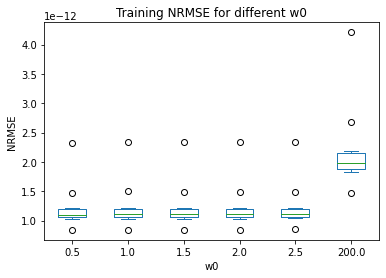

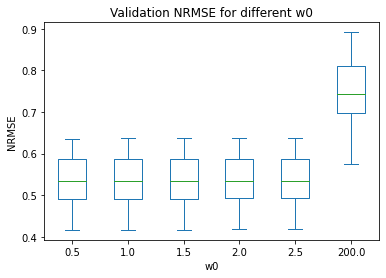

In [ ]:
# Define the number of experiments to run
num_experiments = 10

# Define the number of variables to test
w0_list = [0.5,1,1.5,2,2.5,200]

# Define other parameters for the experiments
num_samples = 1000
num_variables = 1000
noise_var = 0.1
lmbda_2 = 0
lmbda_1 = 0
dt={}
dv={}
# Run the experiments
for w0 in w0_list:
    # Initialize lists to store NRMSE for each experiment
    train_nrmse_list = []
    val_nrmse_list = []
    for i in range(num_experiments):
        # Set a random seed for reproducibility
        np.random.seed(i)
        X_train, X_val, t_train, t_val = train_test_split(generate_data_matrix(num_samples, num_variables), 
        generate_target_vector(generate_data_matrix(num_samples, num_variables), np.random.rand(num_variables), w0, noise_var), test_size=0.2)
        w = estimate_weights_pi(X_train, t_train, lmbda_2, lmbda_1)
        train_nrmse = calculate_nrmse(np.dot(X_train, w), t_train)
        val_nrmse = calculate_nrmse(np.dot(X_val, w), t_val)
        train_nrmse_list.append(train_nrmse)
        val_nrmse_list.append(val_nrmse)
        dt[w0]=train_nrmse_list
        dv[w0]=val_nrmse_list

# Plot the results using box plots
import pandas as pd
dft=pd.DataFrame(dt)
dft.plot(kind="box")
plt.xlabel('w0')
plt.ylabel('NRMSE')
plt.title("Training NRMSE for different w0")
plt.show()

dfv=pd.DataFrame(dv)
dfv.plot(kind="box")
plt.xlabel('w0')
plt.ylabel('NRMSE')
plt.title("Validation NRMSE for different w0")
plt.show()

Comment:
- Training and validation NRMSE obtained using pseudo inverse with w0, if w0 is too large or too small, it might lead to overfitting or underfitting, respectively

**e) Training and validation NRMSE obtained using pseudo inverse with lambda2**

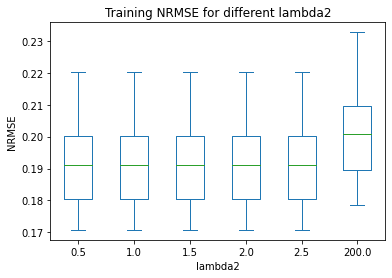

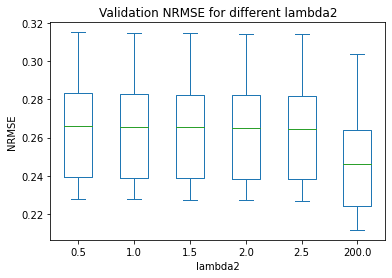

In [ ]:
# Define the number of experiments to run
num_experiments = 10

# Define the different lambda 2 to test
lmbda2_list = [0.5,1,1.5,2,2.5,200]

# Define other parameters for the experiments
num_samples = 1000
num_variables = 100
w0 = 1
noise_var = 0.1
lmbda_1 = 0

# Run the experiments
for lmbda_2 in lmbda2_list:   
    # Initialize lists to store NRMSE for each experiment
    train_nrmse_list = []
    val_nrmse_list = []
    for i in range(num_experiments):
        # Set a random seed for reproducibility
        np.random.seed(i)
        X_train, X_val, t_train, t_val = train_test_split(generate_data_matrix(num_samples, num_variables), 
        generate_target_vector(generate_data_matrix(num_samples, num_variables), np.random.rand(num_variables), w0, noise_var), test_size=0.2)
        w = estimate_weights_pi(X_train, t_train, lmbda_2, lmbda_1)
        train_nrmse = calculate_nrmse(np.dot(X_train, w), t_train)
        val_nrmse = calculate_nrmse(np.dot(X_val, w), t_val)
        train_nrmse_list.append(train_nrmse)
        val_nrmse_list.append(val_nrmse)
        dt[lmbda_2]=train_nrmse_list
        dv[lmbda_2]=val_nrmse_list

# Plot the results using box plots
import pandas as pd
dft=pd.DataFrame(dt)
dft.plot(kind="box")
plt.xlabel('lambda2')
plt.ylabel('NRMSE')
plt.title("Training NRMSE for different lambda2")
plt.show()

dfv=pd.DataFrame(dv)
dfv.plot(kind="box")
plt.xlabel('lambda2')
plt.ylabel('NRMSE')
plt.title("Validation NRMSE for different lambda2")
plt.show()

Comment:
- Training and validation NRMSE obtained using pseudo inverse with lambda2, as lambda2 increases, the model is less likely to overfit, but the NRMSE might increase as the model is forced to be more regularized.

**f) Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points**

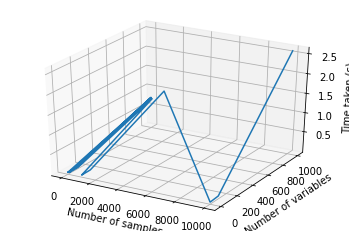

In [ ]:
import time

# Define the number of samples and variables to test
num_samples_list = [10**i for i in range(5)]
num_variables_list = [10**i for i in range(4)]

# Initialize lists to store time taken for each experiment
time_list = []

# Define other parameters for the experiments
noise_var = 0.1
w0 = 1
lmbda_2 = 0
lmbda_1 = 0

# Run the experiments
for num_samples in num_samples_list:
    for num_variables in num_variables_list:
        X = generate_data_matrix(num_samples, num_variables)
        t = generate_target_vector(X, np.random.rand(num_variables), w0, noise_var)
        start_time = time.time()
        w = estimate_weights_pi(X, t, lmbda_2, lmbda_1)
        end_time = time.time()
        time_taken = end_time - start_time
        time_list.append((num_samples, num_variables, time_taken))

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot([x[0] for x in time_list], [x[1] for x in time_list])
# ax.set_xlabel('Number of samples')
# ax.set_ylabel('Time taken (s)')
# plt.show()
# Plot the results as a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([x[0] for x in time_list], [x[1] for x in time_list], [x[2] for x in time_list])
ax.set_xlabel('Number of samples')
ax.set_ylabel('Number of variables')
ax.set_zlabel('Time taken (s)')
plt.show()

Comments:
- As the number of samples or variables increases, the computational complexity of the solution increases, leading to a longer time to solve.

**g) Training and validation NRMSE obtained using gradient descent with max_iter**

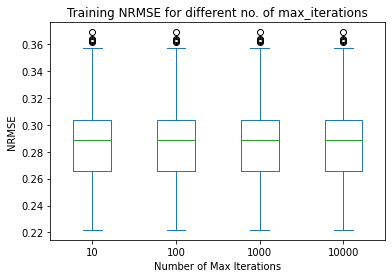

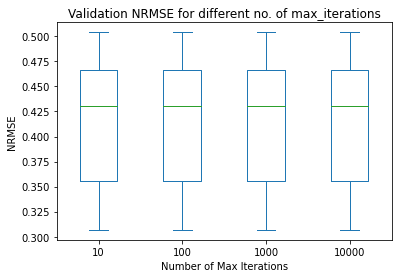

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
train_nrmse_list = []
val_nrmse_list = []

num_samples = 100
num_variables = 10
w = np.random.rand(num_variables)
noise_var = 0.1
lmbda_2 = 0
lmbda_1 = 0
dt={}
dv={}
max_iter_list = [10, 100, 1000, 10000]

# Define the number of experiments to run
num_experiments = 10

for max_iter in max_iter_list:
    for i in range(num_experiments):
    # Set a random seed for reproducibility
        np.random.seed(i)
        X_train, X_val, t_train, t_val = train_test_split(generate_data_matrix(num_samples, num_variables), 
        generate_target_vector(generate_data_matrix(num_samples, num_variables),w, w0, noise_var), test_size=0.2)
        w, nrmse = estimate_weights_gd(X_train, t_train, lambda2=0.1, lambda1=0.01, eta=0.1, max_iter=max_iter, min_change_NRMSE=0.00001)
        train_nrmse_list.append(nrmse)
        val_nrmse_list.append(calculate_nrmse(np.dot(X_val, w), t_val))
        dt[max_iter]=train_nrmse_list
        dv[max_iter]=val_nrmse_list

# Plot the results using box plots
import pandas as pd
dft=pd.DataFrame(dt)
dft.plot(kind="box")
plt.xlabel('Number of Max Iterations')
plt.ylabel('NRMSE')
plt.title("Training NRMSE for different no. of max_iterations")
plt.show()

dfv=pd.DataFrame(dv)
dfv.plot(kind="box")
plt.xlabel('Number of Max Iterations')
plt.ylabel('NRMSE')
plt.title("Validation NRMSE for different no. of max_iterations")
plt.show()

Comments:
- The training and validation NRMSE obtained using gradient descent may decrease as the number of iterations increases as the model converges to the optimal solution. However, increasing the number of iterations beyond a certain point may lead to overfitting and an increase in the validation NRMSE.

**h) Training and validation NRMSE obtained using gradient descent with eta**

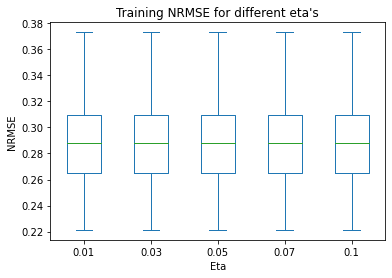

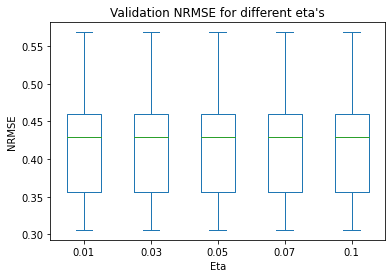

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
train_nrmse_list = []
val_nrmse_list = []

num_samples = 100
num_variables = 10
w = np.random.rand(num_variables)
noise_var = 0.1
lmbda_2 = 0
lmbda_1 = 0
dt={}
dv={}
eta_list = [0.01, 0.03, 0.05,0.07,0.1]
# Define the number of experiments to run
num_experiments = 10
for eta in eta_list:
    for i in range(num_experiments):
    # Set a random seed for reproducibility
        np.random.seed(i)
        X_train, X_val, t_train, t_val = train_test_split(generate_data_matrix(num_samples, num_variables), 
        generate_target_vector(generate_data_matrix(num_samples, num_variables),w, w0, noise_var), test_size=0.2)
        w, nrmse = estimate_weights_gd(X_train, t_train, lambda2=0.1, lambda1=0.01, eta=eta, max_iter=100, min_change_NRMSE=0.00001)
        train_nrmse_list.append(nrmse)
        val_nrmse_list.append(calculate_nrmse(np.dot(X_val, w), t_val))
        dt[eta]=train_nrmse_list
        dv[eta]=val_nrmse_list

# Plot the results using box plots
import pandas as pd
dft=pd.DataFrame(dt)
dft.plot(kind="box")
plt.xlabel('Eta')
plt.ylabel('NRMSE')
plt.title("Training NRMSE for different eta's")
plt.show()

dfv=pd.DataFrame(dv)
dfv.plot(kind="box")
plt.xlabel('Eta')
plt.ylabel('NRMSE')
plt.title("Validation NRMSE for different eta's")
plt.show()

Comments:
- The value of eta affects the convergence rate of gradient descent. A large eta value may lead to fast convergence but may result in overshooting the optimal solution and slow convergence. On the other hand, a small eta value may result in slow convergence but may ensure that the optimal solution is reached. An optimal eta balances the trade-off between convergence rate and accuracy, leading to a low training and validation NRMSE.

**i) Time taken to solve gradient descent with number of samples and number of variables and its breaking points**

<ipython-input-14-93b49b0ce6dd>:3: RuntimeWarning: divide by zero encountered in double_scalars
  nrmse = rmse / (np.max(t) - np.min(t))                # calculating normalised rmse
<ipython-input-15-50cb06f2d1a0>:21: RuntimeWarning: invalid value encountered in double_scalars
  if abs(prev_nrmse - curr_nrmse) < min_change_NRMSE or iter_count > max_iter:


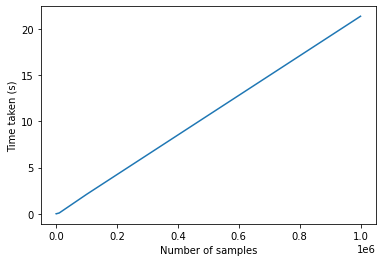

In [ ]:
import time

# Define the number of samples and variables to test
num_samples_list = [10**i for i in range(7)]
num_variables = 100   #[10**i for i in range(2)]

# Initialize lists to store time taken for each experiment
time_list = []

# Define other parameters for the experiments
noise_var = 0.1
w0 = 1
lmbda_2 = 0
lmbda_1 = 0

# Run the experiments
for num_samples in num_samples_list:
    # for num_variables in num_variables_list:
        X = generate_data_matrix(num_samples, num_variables)
        t = generate_target_vector(X, np.random.rand(num_variables), w0, noise_var)
        start_time = time.time()
        w, nrmse = estimate_weights_gd(X, t, lambda2=0.1, lambda1=0.01, eta=0.01, max_iter=100, min_change_NRMSE=0.00001)
        end_time = time.time()
        time_taken = end_time - start_time
        time_list.append((num_samples,  time_taken))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([x[0] for x in time_list], [x[1] for x in time_list])
ax.set_xlabel('Number of samples')
ax.set_ylabel('Time taken (s)')
plt.show()

Comments:
- As the matrix size increases, the time taken to solve the problem increases, with a potential breaking point where the computational time becomes too large to be feasible.

**j) Time taken to solve gradient descent with number of variables and its breaking point**

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-14-93b49b0ce6dd>:2: RuntimeWarning: overflow encountered in square
  rmse = np.sqrt(np.mean((y-t)**2))                     # calculating root mean square error
<ipython-input-15-50cb06f2d1a0>:21: RuntimeWarning: invalid value encountered in double_scalars
  if abs(prev_nrmse - curr_nrmse) < min_change_NRMSE or iter_count > max_iter:


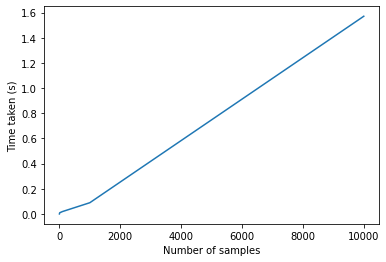

In [ ]:
import time

# Define the number of samples and variables to test
num_samples = 1000 #[10**i for i in range(7)]
num_variables_list = [10**i for i in range(5)]

# Initialize lists to store time taken for each experiment
time_list = []

# Define other parameters for the experiments
noise_var = 0.1
w0 = 1
lmbda_2 = 0
lmbda_1 = 0

# Run the experiments
# for num_samples in num_samples_list:
for num_variables in num_variables_list:
        X = generate_data_matrix(num_samples, num_variables)
        t = generate_target_vector(X, np.random.rand(num_variables), w0, noise_var)
        start_time = time.time()
        w, nrmse = estimate_weights_gd(X, t, lambda2=0.1, lambda1=0.01, eta=0.01, max_iter=100, min_change_NRMSE=0.00001)
        end_time = time.time()
        time_taken = end_time - start_time
        time_list.append((num_variables,  time_taken))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([x[0] for x in time_list], [x[1] for x in time_list])
ax.set_xlabel('Number of variables')
ax.set_ylabel('Time taken (s)')
plt.show()

Comments:
- As the matrix size increases, the time taken to solve the problem increases, with a potential breaking point where the computational time becomes too large to be feasible.

**k) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2**

In [ ]:
def nearly_zero_weights(w, threshold=1e-5):
    return np.sum(np.abs(w) < threshold)

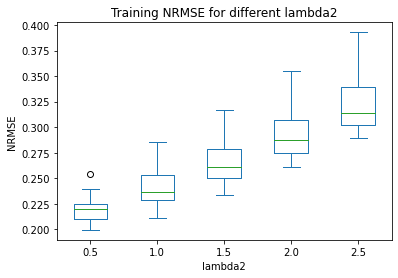

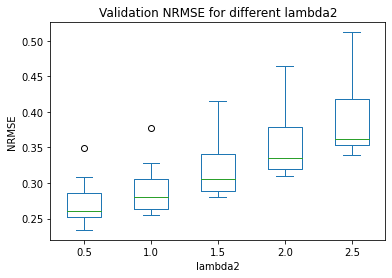

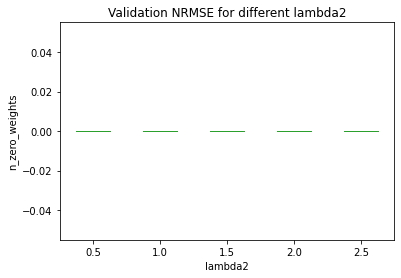

In [ ]:
num_samples = 1000
num_variables = 100
w = np.random.rand(num_variables)
noise_var = 0.1
threshold=1e-4
dt={}
dv = {}
dn={}
lmbda2_list = [0.5,1,1.5,2,2.5]
# Define the number of experiments to run
num_experiments = 10
for lambda2 in lmbda2_list:  
    train_nrmse_list = []
    val_nrmse_list = []
    n_zero_weights_list = []
    for i in range(num_experiments):
    # Set a random seed for reproducibility
        np.random.seed(i)
        X_train, X_val, t_train, t_val = train_test_split(generate_data_matrix(num_samples, num_variables), 
        generate_target_vector(generate_data_matrix(num_samples, num_variables),w, w0, noise_var), test_size=0.2)
        w, nrmse = estimate_weights_gd(X_train, t_train, lambda2=lambda2, lambda1=0.01, eta=0.01, max_iter=100, min_change_NRMSE=0.00001)
        n_zero_weights = nearly_zero_weights(w,threshold)
        train_nrmse_list.append(nrmse)
        val_nrmse_list.append(calculate_nrmse(np.dot(X_val, w), t_val))
        n_zero_weights_list.append(n_zero_weights)
        dt[lambda2]=train_nrmse_list
        dv[lambda2]=val_nrmse_list
        dn[lambda2]=n_zero_weights_list
# Plot the results using box plots
import pandas as pd
dft=pd.DataFrame(dt)
dft.plot(kind="box")
plt.xlabel('lambda2')
plt.ylabel('NRMSE')
plt.title("Training NRMSE for different lambda2")
plt.show()

dfv=pd.DataFrame(dv)
dfv.plot(kind="box")
plt.xlabel('lambda2')
plt.ylabel('NRMSE')
plt.title("Validation NRMSE for different lambda2")
plt.show()

dfn=pd.DataFrame(dn)
dfn.plot(kind="box")
plt.xlabel('lambda2')
plt.ylabel('n_zero_weights')
plt.title("Validation NRMSE for different lambda2")
plt.show()

Comments:
- If lambda2 is set too low, the model may overfit the data, leading to low training NRMSE but high validation NRMSE, and a high number of nearly zero weights. If lambda2 is set too high, the model may underfit the data, leading to high NRMSE values, and a low number of nearly zero weights.

**l) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1**

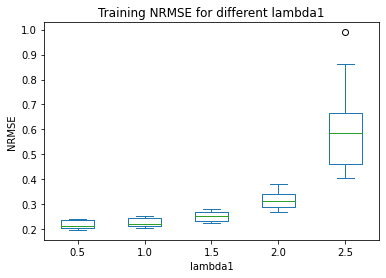

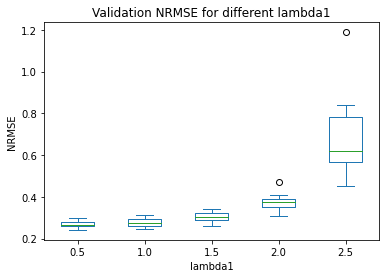

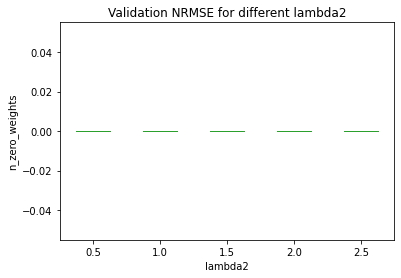

In [ ]:
num_samples = 1000
num_variables = 100
w = np.random.rand(num_variables)
w = np.random.rand(num_variables)
noise_var = 0.1
threshold=1e-4
dt={}
dv = {}
dn={}
threshold=1e-4
lmbda1_list = [0.5,1,1.5,2,2.5]
# Define the number of experiments to run
num_experiments = 10
for lambda1 in lmbda1_list:
    train_nrmse_list = []
    val_nrmse_list = []
    n_zero_weights_list = []
    for i in range(num_experiments):
    # Set a random seed for reproducibility
        np.random.seed(i)
        X_train, X_val, t_train, t_val = train_test_split(generate_data_matrix(num_samples, num_variables), 
        generate_target_vector(generate_data_matrix(num_samples, num_variables),w, w0, noise_var), test_size=0.2)
        w, nrmse = estimate_weights_gd(X_train, t_train, lambda2=0.01, lambda1=lambda1, eta=0.01, max_iter=100, min_change_NRMSE=0.00001)
        n_zero_weights = nearly_zero_weights(w,threshold)
        train_nrmse_list.append(nrmse)
        val_nrmse_list.append(calculate_nrmse(np.dot(X_val, w), t_val))
        dt[lambda1]=train_nrmse_list
        dv[lambda1]=val_nrmse_list
        n_zero_weights_list.append(n_zero_weights)
        dt[lambda1]=train_nrmse_list
        dv[lambda1]=val_nrmse_list
        dn[lambda1]=n_zero_weights_list

# Plot the results using box plots
import pandas as pd
dft=pd.DataFrame(dt)
dft.plot(kind="box")
plt.xlabel('lambda1')
plt.ylabel('NRMSE')
plt.title("Training NRMSE for different lambda1")
plt.show()

dfv=pd.DataFrame(dv)
dfv.plot(kind="box")
plt.xlabel('lambda1')
plt.ylabel('NRMSE')
plt.title("Validation NRMSE for different lambda1")
plt.show()

dfn=pd.DataFrame(dn)
dfn.plot(kind="box")
plt.xlabel('lambda2')
plt.ylabel('n_zero_weights')
plt.title("Validation NRMSE for different lambda2")
plt.show()

Comments:
- A large lambda1 will result in more weights being set to zero, while a small lambda1 will result in fewer weights being set to zero

**m) Training and validation NRMSE for optimal lambda2 with noise variance**

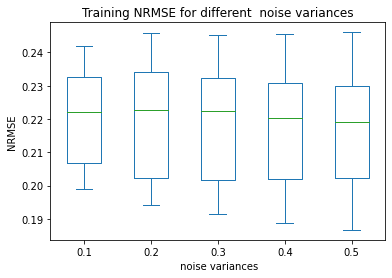

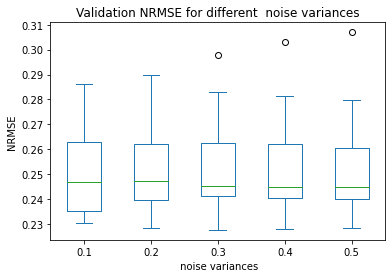

In [ ]:
def optimal_lambda2(X, t, lambda1=0.0, eta=0.0, max_iter=100, min_change_NRMSE=1e-5):
    lambda2_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    NRMSE_list = []
    for lambda2 in lambda2_list:
        w,NRMSE = estimate_weights_gd(X, t, lambda2=lambda2, lambda1=lambda1, eta=eta, max_iter=max_iter, min_change_NRMSE=min_change_NRMSE)
        NRMSE_list.append(NRMSE)
    optimal_lambda2 = lambda2_list[np.argmin(NRMSE_list)]
    return optimal_lambda2

dt={}
dv={}
num_samples = 1000
num_variables = 100
w = np.random.rand(num_variables)
# List of noise variances
noise_variances = [0.1, 0.2, 0.3, 0.4, 0.5]
# Define the number of experiments to run
num_experiments = 10
# Loop through different noise variances
for noise_var in noise_variances:
    train_nrmse_list = []
    val_nrmse_list = []
    for i in range(num_experiments):
    # Set a random seed for reproducibility
        np.random.seed(i)
        X_train, X_val, t_train, t_val = train_test_split(generate_data_matrix(num_samples, num_variables), 
        generate_target_vector(generate_data_matrix(num_samples, num_variables),w, w0, noise_var), test_size=0.2)
        optimal_lambda2_prime = optimal_lambda2(X_train, t_train, lambda1=0.01, eta=0.01, max_iter=100, min_change_NRMSE=0.00001)
        w, nrmse = estimate_weights_gd(X_train, t_train, lambda2= optimal_lambda2_prime, lambda1=0.01, eta=0.01, max_iter=100, min_change_NRMSE=0.00001)
        train_nrmse_list.append(nrmse)
        val_nrmse_list.append(calculate_nrmse(np.dot(X_val, w), t_val))
        dt[noise_var]=train_nrmse_list
        dv[noise_var]=val_nrmse_list

# Plot the results using box plots
import pandas as pd
dft=pd.DataFrame(dt)
dft.plot(kind="box")
plt.xlabel(' noise variances')
plt.ylabel('NRMSE')
plt.title("Training NRMSE for different  noise variances")
plt.show()

dfv=pd.DataFrame(dv)
dfv.plot(kind="box")
plt.xlabel(' noise variances')
plt.ylabel('NRMSE')
plt.title("Validation NRMSE for different  noise variances")
plt.show()

Comments:
- If the noise variance is high, it might lead to overfitting as the model tries to fit the noisy data points. If the noise variance is low, the model might not fit the data points well, leading to high training NRMSE. In such a scenario, the validation NRMSE might be low, indicating good generalization error.

- If the value of lambda2 is too high, leading to high NRMSE values for both the training and validation datasets. On the other hand, if the value of lambda2 is too low, it might lead to overfitting, resulting in high NRMSE values for the validation dataset.

**n) Training and validation NRMSE for optimal lambda1 with noise variance**

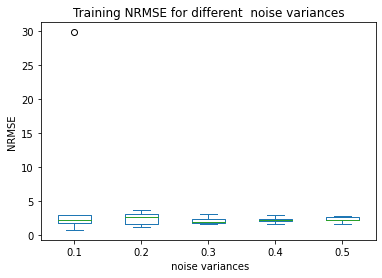

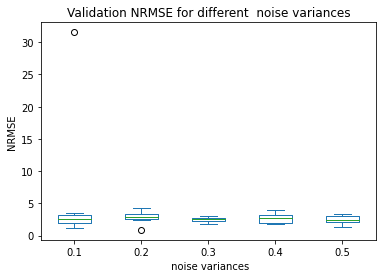

In [ ]:
def optimal_lambda1(X, t, lambda2=0.0, eta=0.0, max_iter=100, min_change_NRMSE=1e-5):
    lambda1_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    NRMSE_list = []
    for lambda1 in lambda1_list:
        w,NRMSE = estimate_weights_gd(X, t, lambda2=lambda2, lambda1=lambda1, eta=eta, max_iter=max_iter, min_change_NRMSE=min_change_NRMSE)
        NRMSE_list.append(NRMSE)
    optimal_lambda1 = lambda1_list[np.argmax(NRMSE_list)]
    return optimal_lambda1

dt={}
dv={}
num_samples = 1000
num_variables = 100
w = np.random.rand(num_variables)
# List of noise variances
noise_variances = [0.1, 0.2, 0.3, 0.4, 0.5]
# Define the number of experiments to run
num_experiments = 10
# Loop through different noise variances
for noise_var in noise_variances:
    train_nrmse_list = []
    val_nrmse_list = []
    for i in range(num_experiments):
    # Set a random seed for reproducibility
        np.random.seed(i)
        X_train, X_val, t_train, t_val = train_test_split(generate_data_matrix(num_samples, num_variables), 
        generate_target_vector(generate_data_matrix(num_samples, num_variables),w, w0, noise_var), test_size=0.2)
        optimal_lambda1_prime = optimal_lambda1(X_train, t_train, lambda2=0.01, eta=0.01, max_iter=100, min_change_NRMSE=0.00001)
        w, nrmse = estimate_weights_gd(X_train, t_train, lambda2=0.01, lambda1=optimal_lambda1_prime, eta=0.01, max_iter=100, min_change_NRMSE=0.00001)
        train_nrmse_list.append(nrmse)
        val_nrmse_list.append(calculate_nrmse(np.dot(X_val, w), t_val))
        dt[noise_var]=train_nrmse_list
        dv[noise_var]=val_nrmse_list

# Plot the results using box plots
import pandas as pd
dft=pd.DataFrame(dt)
dft.plot(kind="box")
plt.xlabel(' noise variances')
plt.ylabel('NRMSE')
plt.title("Training NRMSE for different  noise variances")
plt.show()

dfv=pd.DataFrame(dv)
dfv.plot(kind="box")
plt.xlabel(' noise variances')
plt.ylabel('NRMSE')
plt.title("Validation NRMSE for different  noise variances")
plt.show()

Comment:
- A larger number of variables may require a larger lambda1 value to prevent overfitting, while a smaller number of training samples may require a smaller lambda1 to avoid underfitting

**o) Experiment (f) but, this time with number of training samples and number of variables**

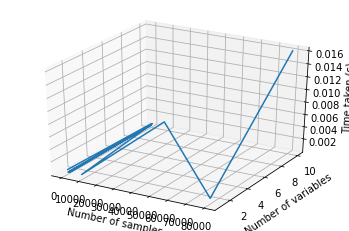

In [ ]:
import time

# Define the number of samples and variables to test
num_samples_list = [10**(i+1) for i in range(5)]
num_variables_list = [10**i for i in range(2)]

# Initialize lists to store time taken for each experiment
time_list = []

# Define other parameters for the experiments
noise_var = 0.1
w0 = 1
lmbda_2 = 0
lmbda_1 = 0

# Run the experiments
for num_samples in num_samples_list:
    for num_variables in num_variables_list:
        w = np.random.rand(num_variables)
        X_train, X_val, t_train, t_val = train_test_split(generate_data_matrix(num_samples, num_variables), 
        generate_target_vector(generate_data_matrix(num_samples, num_variables),w, w0, noise_var), test_size=0.2)
        start_time = time.time()
        w = estimate_weights_pi(X_train, t_train, lmbda_2, lmbda_1)
        end_time = time.time()
        time_taken = end_time - start_time
        time_list.append((X_train.shape[0],num_variables, time_taken))

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot([x[0] for x in time_list], [x[1] for x in time_list])
# ax.set_xlabel('Number of training samples')
# ax.set_ylabel('Time taken (s)')
# plt.show()

# Plot the results as a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([x[0] for x in time_list], [x[1] for x in time_list], [x[2] for x in time_list])
ax.set_xlabel('Number of samples')
ax.set_ylabel('Number of variables')
ax.set_zlabel('Time taken (s)')
plt.show()

**14. Write your overall learning points by doing entire assignment.**

- Linear regression is a widely used and powerful tool for modeling linear 
relationships between a dependent variable and one or more independent variables.

- Linear regression can be estimated using different methods such as the Pseudo-inverse and gradient descent.

- Pseudo-inverse is a closed-form solution, which finds the exact solution in a single step, but it's computationally expensive for large datasets.

- Gradient descent is an iterative method, which finds the solution through iteratively updating the weights.

- Regularization can be applied to linear regression to prevent overfitting by adding a penalty term to the cost function.

- L1 and L2 regularization are commonly used in linear regression, L1 regularization tends to produce sparse models with few non-zero weights.

- Gradient descent is a powerful optimization algorithm that can find the optimal solution for linear regression, by minimizing the cost function.

- The learning rate (eta) and number of iteration (max_iter) are important hyperparameters for gradient descent that need to be chosen carefully.

- The performance of linear regression can be measured using different evaluation metrics, such as mean square error, root mean square error and normalized root mean square error.

- The performance of linear regression can be affected by different factors such as the number of training samples, number of variables, noise variance, w0, and regularization parameters.

- Running multiple experiments with different random seeds, plotting the results using box plots, and commenting on the trends and potential reasons for the relations is an important step in understanding the behavior of the model.

- Understanding the data, feature engineering, model selection and ensemble methods are important in achieving good performance.


**15. Quote your references, including roll numbers of fellow students with whom you discussed. Be specific about which part was inspired by what source or which friend.**

- Major use of Geeks for geeks for some functions as i know the theory of functions but don't know how to code.
- For 3d graph plotting read matplotlib documentation and use several websites examples to implement
- for plotting graph general using pandas to make dataframe i take help from my friend (200260002)
- I also use several general webs as i proceed with assignment but i forget the name of few websites because when i google my doubt, some sites appeared, from which i take help and closed it like-https://jakevdp.github.io/PythonDataScienceHandbook , etc.
- for debugging i mostly used stackoverflow 
